# Data curation of Groundwater head-Stream stage differences
This notebook describes setting up of groundwater head-stream stage differences for use with OLPROC.

## Background

## Aim and purpose
Attention: It is a prerequisite that the two notebooks used to curate head and stage data has been run prior to running this notebook.

Essential imports:

In [1]:
import os
import numpy as np
import pandas as pd
import pyemu
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
ssf_dir = os.path.join('..', '..', 'data', 'olproc_input')
assert(ssf_dir)

In [3]:
os.listdir(ssf_dir)

['dh-head-stage1.ssf',
 'obs-gage1.ssf',
 'obs-gage2.ssf',
 'obs-head-all.ssf',
 'obs-stage.ssf',
 'readme.md']

In [4]:
head = pyemu.utils.smp_utils.smp_to_dataframe(os.path.join(ssf_dir, 'obs-head-all.ssf'), datetime_format=None)
stage = pyemu.utils.smp_utils.smp_to_dataframe(os.path.join(ssf_dir, 'obs-stage.ssf'), datetime_format=None)

In [5]:
print(head.name.unique())

['b10-1' 'b14-1' 'b15-1' 'b16-1' 'b2-1' 'b22-1' 'b26' 'b29' 'b34' 'b35'
 'b36' 'b37' 'b4' 'b8-2' 'b9-2' 'kb1-1' 'kb4-3' 'ni1403-2' 'ni1404-1'
 'ni1405-1' 'ni1407-2' 'ni1408-1' 'ni1409-1' 'ni1410-1' 'ni1412-1'
 'ni15-o1' 'ni15-o44' 'ni15-o46' 'ni15-o47' 'ni15-o48' 'ni1501-3'
 'ni1502-2' 'ni1504-2' 'ni1505-2' 'ni1506-1' 'ni1507-2' 'ni1601-3'
 'ni1602-1' 'ni1603-1' 'ni1605-1' 'ni1606-1' 'ni1607-2' 'ni1608-1'
 'ni1609-2' 'ni1610-2' 'ni1611-1' 'ni1612-1' 'ni1613-1' 'ni1701-1'
 'ni1702-1' 'ni1703-1' 'ni1704-1' 'ni1705-1' 'ni1706-1' 'ni1707-1'
 'ni1708-1' 'ni1709-1' 'ni1711-1' 'ni1712-1' 'ni1801-1' 'ni1802-1'
 'ni1803-1' 'ni1804-1']


In [6]:
print(stage.name.unique())

['ni15-o1-stg' 'ni15-o44-stg' 'ni15-o46-stg' 'ni15-o47-stg' 'ni15-o48-stg']


This can be done programatically. But since it's only five datasets that contain both head and stage measurements, lets do it manually:

In [7]:
head = head.loc[head['name'].isin(['ni15-o1', 'ni15-o44', 'ni15-o46', 'ni15-o47', 'ni15-o48'])].reset_index(drop=True)

Let's also append -head just to make it more obvious what's going on:

In [8]:
head['name'] = head['name'].astype(str) + '-head'

In [9]:
print(head.name.unique())

['ni15-o1-head' 'ni15-o44-head' 'ni15-o46-head' 'ni15-o47-head'
 'ni15-o48-head']


In [10]:
df = pd.concat([head, stage], ignore_index=True, sort=False)
print(df.name.unique())
display(df)

['ni15-o1-head' 'ni15-o44-head' 'ni15-o46-head' 'ni15-o47-head'
 'ni15-o48-head' 'ni15-o1-stg' 'ni15-o44-stg' 'ni15-o46-stg'
 'ni15-o47-stg' 'ni15-o48-stg']


,datetime,name,value
0,2016-11-15 12:00:00,ni15-o1-head,136.248909
1,2016-11-16 12:00:00,ni15-o1-head,136.239011
2,2016-11-17 12:00:00,ni15-o1-head,136.276234
3,2016-11-18 12:00:00,ni15-o1-head,136.322511
4,2016-11-19 12:00:00,ni15-o1-head,136.398751
...,...,...,...
6314,2017-06-17 12:00:00,ni15-o48-stg,133.494229
6315,2017-06-18 12:00:00,ni15-o48-stg,133.489716
6316,2017-06-19 12:00:00,ni15-o48-stg,133.484119
6317,2017-06-20 12:00:00,ni15-o48-stg,133.498522


Pivot dataframe in order to facilitate calculation of head-stage differences:

In [11]:
dfp = df.pivot(index='datetime', columns='name', values='value')
display(dfp)

name,ni15-o1-head,ni15-o1-stg,ni15-o44-head,ni15-o44-stg,ni15-o46-head,ni15-o46-stg,ni15-o47-head,ni15-o47-stg,ni15-o48-head,ni15-o48-stg
datetime,,,,,,,,,,
2015-12-08 12:00:00,NaN,NaN,NaN,NaN,NaN,134.990017,NaN,134.660000,NaN,NaN
2015-12-09 12:00:00,NaN,NaN,NaN,NaN,NaN,134.987871,NaN,134.660000,NaN,NaN
2015-12-10 12:00:00,NaN,NaN,NaN,136.183900,135.046667,134.993142,134.470000,134.678333,133.721950,133.688400
2015-12-11 12:00:00,NaN,NaN,NaN,136.173042,135.030000,134.976157,134.453333,134.676667,133.724642,133.666608
2015-12-12 12:00:00,NaN,NaN,NaN,136.168900,135.033333,134.975015,134.453333,134.678333,133.720533,133.670833
...,...,...,...,...,...,...,...,...,...,...
2019-10-07 12:00:00,136.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08 12:00:00,136.289211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09 12:00:00,136.307905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compute head-stage differences:

In [12]:
sites = ['ni15-o1', 'ni15-o44', 'ni15-o46', 'ni15-o47', 'ni15-o48']
for site in sites:
    dfp[f'dh-{site}'] = dfp[f'{site}-head'] - dfp[f'{site}-stg']

In [13]:
display(dfp)

name,ni15-o1-head,ni15-o1-stg,ni15-o44-head,ni15-o44-stg,ni15-o46-head,ni15-o46-stg,ni15-o47-head,ni15-o47-stg,ni15-o48-head,ni15-o48-stg,dh-ni15-o1,dh-ni15-o44,dh-ni15-o46,dh-ni15-o47,dh-ni15-o48
datetime,,,,,,,,,,,,,,,
2015-12-08 12:00:00,NaN,NaN,NaN,NaN,NaN,134.990017,NaN,134.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-09 12:00:00,NaN,NaN,NaN,NaN,NaN,134.987871,NaN,134.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-10 12:00:00,NaN,NaN,NaN,136.183900,135.046667,134.993142,134.470000,134.678333,133.721950,133.688400,NaN,NaN,0.053525,-0.208333,0.033550
2015-12-11 12:00:00,NaN,NaN,NaN,136.173042,135.030000,134.976157,134.453333,134.676667,133.724642,133.666608,NaN,NaN,0.053843,-0.223334,0.058034
2015-12-12 12:00:00,NaN,NaN,NaN,136.168900,135.033333,134.975015,134.453333,134.678333,133.720533,133.670833,NaN,NaN,0.058318,-0.225000,0.049700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07 12:00:00,136.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08 12:00:00,136.289211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09 12:00:00,136.307905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


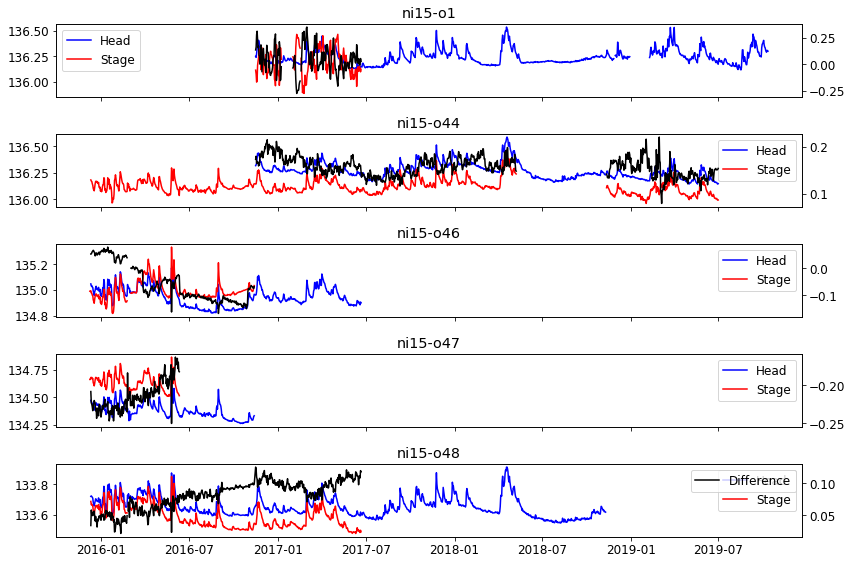

In [14]:
fig, axs = plt.subplots(len(sites), sharex=True, figsize=(12,8))

for (index, site) in enumerate(sites):
    temp_df = dfp[[f'{site}-head', f'{site}-stg', f'dh-{site}']]
    ax2 = axs[index].twinx()
    ax2.plot(temp_df.index, temp_df[f'dh-{site}'], color='black', label='Difference')
    axs[index].plot(temp_df.index, temp_df[f'{site}-head'], color='blue', label='Head')
    axs[index].plot(temp_df.index, temp_df[f'{site}-stg'], color='red', label='Stage')
    axs[index].legend()
    axs[index].title.set_text(site)

plt.legend()
plt.tight_layout()

Filter out relevant columns and return datetime index as a separate column:

In [15]:
dfp = dfp[['dh-ni15-o1', 'dh-ni15-o44', 'dh-ni15-o46', 'dh-ni15-o47', 'dh-ni15-o48']]
dfp['datetime'] = dfp.index
display(dfp)

name,dh-ni15-o1,dh-ni15-o44,dh-ni15-o46,dh-ni15-o47,dh-ni15-o48,datetime
datetime,,,,,,
2015-12-08 12:00:00,NaN,NaN,NaN,NaN,NaN,2015-12-08 12:00:00
2015-12-09 12:00:00,NaN,NaN,NaN,NaN,NaN,2015-12-09 12:00:00
2015-12-10 12:00:00,NaN,NaN,0.053525,-0.208333,0.033550,2015-12-10 12:00:00
2015-12-11 12:00:00,NaN,NaN,0.053843,-0.223334,0.058034,2015-12-11 12:00:00
2015-12-12 12:00:00,NaN,NaN,0.058318,-0.225000,0.049700,2015-12-12 12:00:00
...,...,...,...,...,...,...
2019-10-07 12:00:00,NaN,NaN,NaN,NaN,NaN,2019-10-07 12:00:00
2019-10-08 12:00:00,NaN,NaN,NaN,NaN,NaN,2019-10-08 12:00:00
2019-10-09 12:00:00,NaN,NaN,NaN,NaN,NaN,2019-10-09 12:00:00


Convert from wide to long-form format:

In [16]:
dfl = pd.melt(dfp, id_vars='datetime', value_vars=['dh-ni15-o1', 'dh-ni15-o44', 'dh-ni15-o46', 'dh-ni15-o47', 'dh-ni15-o48'])
display(dfl)

,datetime,name,value
0,2015-12-08 12:00:00,dh-ni15-o1,NaN
1,2015-12-09 12:00:00,dh-ni15-o1,NaN
2,2015-12-10 12:00:00,dh-ni15-o1,NaN
3,2015-12-11 12:00:00,dh-ni15-o1,NaN
4,2015-12-12 12:00:00,dh-ni15-o1,NaN
...,...,...,...
7000,2019-10-07 12:00:00,dh-ni15-o48,NaN
7001,2019-10-08 12:00:00,dh-ni15-o48,NaN
7002,2019-10-09 12:00:00,dh-ni15-o48,NaN
7003,2019-10-10 12:00:00,dh-ni15-o48,NaN


Drop NaN rows and print length of new dataframe:

In [17]:
dfl = dfl.dropna(how='any').reset_index(drop=True)
print(len(dfl))

2041


## Visualize results
For good measure let's visualize the curated dataset that will be used as input for OLPROC:

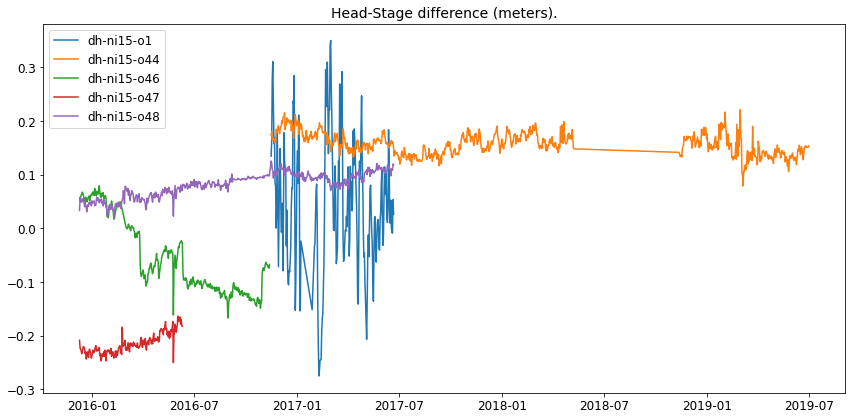

In [18]:
plt.figure(figsize=(12, 6))
for site in dfl['name'].unique():
    x = dfl.loc[dfl['name'] == site]['datetime']
    y = dfl.loc[dfl['name'] == site]['value']
    plt.plot(x, y, label=site)
plt.legend()
plt.title('Head-Stage difference (meters).', fontsize=14)
plt.tight_layout()

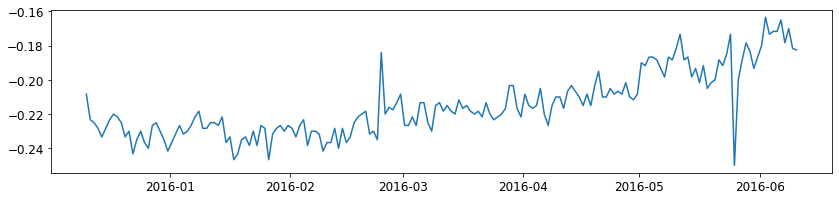

In [19]:
plt.figure(figsize=(14, 3))
plt.plot(dfl.loc[dfl['name'] == 'dh-ni15-o47']['datetime'], dfl.loc[dfl['name'] == 'dh-ni15-o47']['value'])

In [20]:
dfl.loc[dfl['name'] == 'dh-ni15-o47'][100:120]

,datetime,name,value
1400,2016-03-19 12:00:00,dh-ni15-o47,-0.220000
1401,2016-03-20 12:00:00,dh-ni15-o47,-0.218333
1402,2016-03-21 12:00:00,dh-ni15-o47,-0.221666
1403,2016-03-22 12:00:00,dh-ni15-o47,-0.213333
1404,2016-03-23 12:00:00,dh-ni15-o47,-0.220000
1405,2016-03-24 12:00:00,dh-ni15-o47,-0.223333
1406,2016-03-25 12:00:00,dh-ni15-o47,-0.221666
1407,2016-03-26 12:00:00,dh-ni15-o47,-0.220000
1408,2016-03-27 12:00:00,dh-ni15-o47,-0.216667
1409,2016-03-28 12:00:00,dh-ni15-o47,-0.203333


## Prepare datasets for OLPROC

OLPROC reads site sample files (ssf/smp), which is long format data. The following section describes the exportation of the resampled dataset to a site sample file using `pyemu.utils.smp_utils.dataframe_to_smp`

Use `pyemu.utils.smp_utils.dataframe_to_smp` to create a site sample file:

In [21]:
pyemu.utils.smp_utils.dataframe_to_smp(
    dfl,
    os.path.join(ssf_dir, 'dh-head-stage1.ssf'),
    name_col='name',
    datetime_col='datetime',
    value_col='value',
    datetime_format='dd/mm/yyyy',
    value_format='{0:15.6E}',
    max_name_len=12
)

Done.